In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [3]:
df = pd.read_excel('/content/gdrive/MyDrive/LDS6_K272_ONLINE_TranBaoGiang/Customer Lifetime Value/Online Retail.xlsx')

**InvoiceNo**: Invoice number. Nominal. A 6-digit intergral number that uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.

**Stock Code**: product (item) code. Nominal. A 5-digit intergral number that is uniquely assigned to each distinct product.

**Description**: Product (item) name. Nominal.

**Quantity**: The quantities of each product (item) per transaction. Numeric.

**Invoice Date**: Invoice date and time. Numeric. the day and time when a transaction was generated.

**UnitPrice**: Unit Price. Numeric. Product price per unit in sterling.

**CustomerID**: Customer number. Nominal. A 5-digit intergral number that is uniquely assigned to each customer.

**Country**: Country name. Nominal. The name of the country where a customer resides.

#Pre-processing Data

**interquartile range**

The interquartile range (IQR) is the difference between the 75th percentile (Q3) and the 25th percentile (Q1) in a dataset. It measures the spread of the middle 50% of values.

You could define an observation to be an outlier if it is 1.5 times the interquartile range greater than the third quartile (Q3) or 1.5 times the interquartile range less than the first quartile (Q1)

**z-scores**

A z-score tells you how many standard deviations a given value is from the mean. We use the following formula to calculate a z-score:

z = (X – μ) / σ

X is a single raw data value
μ is the population mean
σ is the population standard deviation
You could define an observation to be an outlier if it has a z-score less than -3 or greater than 3.

In [37]:
def z_score_method(data):
  #find absolute value of z-score for each observation
  z = np.abs(stats.zscore(data))
  #only keep rows in dataframe with all z-score less than absolute value of 3
  data_clean_z_score = data[(z<3).all(axis=1)]

In [42]:
def interquartile_range_method(data,variable):
  #find Q1, Q3, and interquartile range
  Q1 = data['variable'].quantile(q=0.25)
  Q3 = data['variable'].quantile(q=0.75)
  IQR = data['variable'].apply(stats.iqr)
  data_clean_iqr_range = data['variable'][~((data['variable'] < (Q1 - 1.5*IQR))|(data['variable'] > (Q3 + 1.5*IQR))).any(axis = 1)]

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    532621 non-null  object        
 1   StockCode    532621 non-null  object        
 2   Description  531167 non-null  object        
 3   Quantity     532621 non-null  int64         
 4   InvoiceDate  532621 non-null  datetime64[ns]
 5   UnitPrice    532621 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      532621 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


**Note**:  
Dataset have 541909 values, 8 columns.  
There are null values in  CustomerID column and description column.

In [25]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,532621.000000,532621.000000,397924.000000
mean,10.239972,3.847621,15294.315171
std,159.593551,41.758023,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


**Note**:  
Quantity, UnitPtrice and CustomerID variable has low distance between median and mean, so distribution of these variable can be normal distribution.  
Distance of max and min values is large so values can be outlier.

## Single variable analysis

### InvoiceNo

In [9]:
df['InvoiceNo'].value_counts()

573585     1114
581219      749
581492      731
580729      721
558475      705
           ... 
554023        1
554022        1
554021        1
554020        1
C558901       1
Name: InvoiceNo, Length: 25900, dtype: int64

In [10]:
#Removing Cancellations from the data
df = df[~df['InvoiceNo'].str.contains('C', na=False)]

### Quantity

In [24]:
df['Quantity'].value_counts()

 1        148227
 2         81829
 12        61063
 6         40868
 4         38484
           ...  
-161           1
-1206          1
-272           1
-304           1
 80995         1
Name: Quantity, Length: 691, dtype: int64

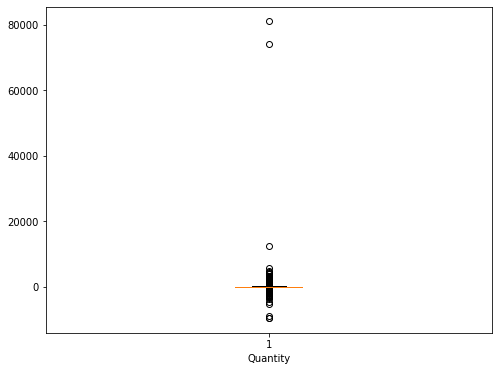

In [31]:
#Check outlier of Quantity variable
plt.figure(figsize = (8,6))
plt.boxplot(df['Quantity'])
plt.xlabel('Quantity')
plt.show()

**Note**:  
Các đơn đặt hàng có giá trị quantity <= 0 là các đơn hàng bị hủy. Do đó, loại bỏ các đơn hàng bị hủy ra khỏi tập data.

In [54]:
df = df[df['Quantity'] > 0]

### CustomerID

In [51]:
df['CustomerID'].isnull().value_counts()

False    397924
True     134697
Name: CustomerID, dtype: int64

In [52]:
#CustomerID có giá trị null.
#Vì xây dựng dự đoán CLV trong thời gian 3 tháng với khách hàng, vị vậy cột customerID là input.
#Loại các giá trị null của cột CustomerID

In [55]:
#Removing null in CustomerID variable
df = df[pd.notnull(df['CustomerID'])]

### InvoiceDate

In [ ]:
print('Date range: %s ~ %s'%(df['InvoiceDate'].min(), df['InvoiceDate'].max()))

Date range: 2010-12-01 08:26:00 ~ 2011-12-09 12:50:00


In [ ]:
df[df['InvoiceDate'] >= '2011-12-01'].shape

(17304, 8)

In [ ]:
#Dữ liệu được thu thập từ 12/2010 đến 12/2011, tuy nhiên tháng 12/2011 dữ liệu ghi nhận đến 9/12/2011.
#Để đảm bảo hiệu quả kết quả dự đoán, đề xuất loại bỏ tháng 12/2011.

In [ ]:
df = df[df['InvoiceDate'] < '2011-12-01']

In [ ]:
df.shape

(380620, 8)

## Create Total Price columns:
**Total Price = Total purchase amount for each transaction**  

TotalPrice = Quantity * UnitPrice

In [56]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [58]:
 df['TotalPrice'].value_counts()

15.00      20082
17.70       9174
16.50       8490
10.20       8028
19.80       7625
           ...  
1305.60        1
277.92         1
481.50         1
89.64          1
66.36          1
Name: TotalPrice, Length: 2940, dtype: int64

## Create Orders Table

In [60]:
orders = df.groupby(by = ['CustomerID','InvoiceNo']).agg({
    'TotalPrice': sum,
    'InvoiceDate': max
})
orders

TotalPrice         InvoiceDate
CustomerID InvoiceNo                                
12346.0    541431       77183.60 2011-01-18 10:01:00
12347.0    537626         711.79 2010-12-07 14:57:00
           542237         475.39 2011-01-26 14:30:00
           549222         636.25 2011-04-07 10:43:00
           556201         382.52 2011-06-09 13:01:00
...                          ...                 ...
18283.0    579673         223.61 2011-11-30 12:59:00
           580872         208.00 2011-12-06 12:02:00
18287.0    554065         765.28 2011-05-22 10:39:00
           570715        1001.32 2011-10-12 10:23:00
           573167          70.68 2011-10-28 09:29:00

[18536 rows x 2 columns]

**Note**:  
With orders table show that each of CustomerID have many Invoice Number.

#Data Analysis

## Preparation of Lifetime Data Structure

**Recency** = Passed time since last purchase [Weekly]

(We calculated receny according to today, because it was calculation, and we calculating the current CVL.)  
In this dataset, recency will be calculated individually for each customer.  

**T** = how long before the analysis date the first purchase was made [Weekly]  

**Frequency** = total number of repeat purchase

**monetary_value** = average earning per purchase

In [93]:
from IPython.core.display import display_svg
def groupby_mean(x):
  return x.mean()

def groupby_count(x):
  return x.count()

def purchase_duration(x):
  return (x.max() - x.min()).days    

def avg_frequency(x):
  return (x.max() - x.min()).days/x.count()



In [94]:
import datetime

In [95]:
groupby_mean.__name__ = 'monetary'
groupby_count.__name__ = 'frequency'
purchase_duration.__name__ = 'recency'
avg_frequency.__name__ = 'purchase_frequency'


In [97]:
summary_df = orders.reset_index().groupby('CustomerID').agg({
'TotalPrice': [min, max, sum, groupby_mean, groupby_count],
'InvoiceDate': [min, max, purchase_duration, avg_frequency]
})

In [76]:
summary_df.head()

TotalPrice                                              \
                  min       max       sum      monetary frequency   
CustomerID                                                          
12346.0      77183.60  77183.60  77183.60  77183.600000         1   
12347.0        224.82   1294.32   4310.00    615.714286         7   
12348.0        227.44    892.80   1797.24    449.310000         4   
12349.0       1757.55   1757.55   1757.55   1757.550000         1   
12350.0        334.40    334.40    334.40    334.400000         1   

                   InvoiceDate                                                 
                           min                 max recency purchase_frequency  
CustomerID                                                                     
12346.0    2011-01-18 10:01:00 2011-01-18 10:01:00       0           0.000000  
12347.0    2010-12-07 14:57:00 2011-12-07 15:52:00     365          52.142857  
12348.0    2010-12-16 19:09:00 2011-09-25 13:13:00     282          70.500000  
12349.0    2011-11-21 09:51:00 2011-11-21 09:51:00       0           0.000000  
12350.0    2011-02-02 16:01:00 2011-02-02 16:01:00       0           0.000000

In [98]:
summary_df.columns = ['_'.join(col).lower() for col in summary_df.columns]

In [99]:
summary_df.head()

,totalprice_min,totalprice_max,totalprice_sum,totalprice_monetary,totalprice_frequency,invoicedate_min,invoicedate_max,invoicedate_recency,invoicedate_purchase_frequency
CustomerID,,,,,,,,,
12346.0,77183.60,77183.60,77183.60,77183.600000,1,2011-01-18 10:01:00,2011-01-18 10:01:00,0,0.000000
12347.0,224.82,1294.32,4310.00,615.714286,7,2010-12-07 14:57:00,2011-12-07 15:52:00,365,52.142857
12348.0,227.44,892.80,1797.24,449.310000,4,2010-12-16 19:09:00,2011-09-25 13:13:00,282,70.500000
12349.0,1757.55,1757.55,1757.55,1757.550000,1,2011-11-21 09:51:00,2011-11-21 09:51:00,0,0.000000
12350.0,334.40,334.40,334.40,334.400000,1,2011-02-02 16:01:00,2011-02-02 16:01:00,0,0.000000


In [100]:
summary_df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   totalprice_min                  4339 non-null   float64       
 1   totalprice_max                  4339 non-null   float64       
 2   totalprice_sum                  4339 non-null   float64       
 3   totalprice_monetary             4339 non-null   float64       
 4   totalprice_frequency            4339 non-null   int64         
 5   invoicedate_min                 4339 non-null   datetime64[ns]
 6   invoicedate_max                 4339 non-null   datetime64[ns]
 7   invoicedate_recency             4339 non-null   int64         
 8   invoicedate_purchase_frequency  4339 non-null   float64       
dtypes: datetime64[ns](2), float64(5), int64(2)
memory usage: 339.0 KB


In [101]:
summary_df.describe()

,totalprice_min,totalprice_max,totalprice_sum,totalprice_monetary,totalprice_frequency,invoicedate_recency,invoicedate_purchase_frequency
count,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000,4339.000000
mean,263.207606,655.817242,2053.793018,419.047702,4.271952,130.418530,30.422026
std,1215.038798,3088.948020,8988.248381,1796.320814,7.705493,132.039186,34.915188
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,92.375000,223.360000,307.245000,178.505000,1.000000,0.000000,0.000000
50%,169.470000,368.310000,674.450000,293.690000,2.000000,92.000000,21.500000
75%,308.630000,621.190000,1661.640000,430.022500,5.000000,251.500000,49.000000
max,77183.600000,168469.600000,280206.020000,84236.250000,210.000000,373.000000,182.500000


**Note**:  
Mean of avg earning per purchase is 419.  
Mean of total number repeat per purchase is 30.

In [102]:
summary_df = summary_df[summary_df['invoicedate_recency'] > 0]

## Total number repeat per purchase Visualdation

In [107]:
totalprice_count = summary_df.groupby('totalprice_frequency').count()['totalprice_min'][:20].reset_index()

In [108]:
totalprice_count.sort_values(by = 'totalprice_min', ascending= False, inplace = True)

In [109]:
totalprice_count['cum'] = round(totalprice_count['totalprice_min'].cumsum()/totalprice_count['totalprice_min'].sum()*100,2)
totalprice_count.head()

,totalprice_frequency,totalprice_min,cum
0,2,780,28.90
1,3,505,47.61
2,4,384,61.84
3,5,243,70.84
4,6,171,77.18


In [110]:
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

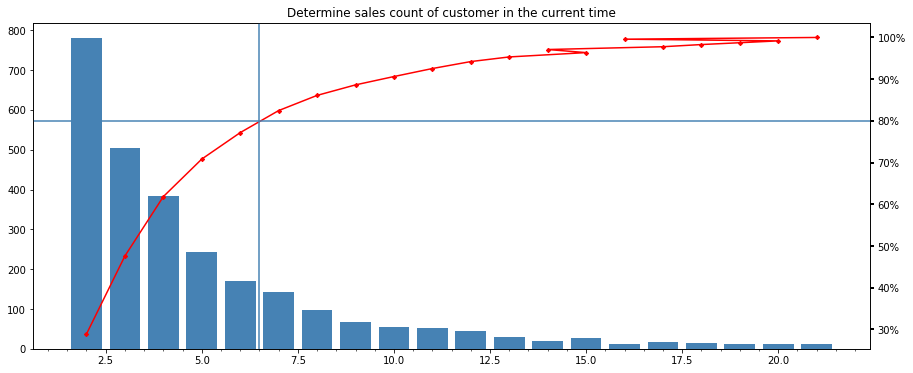

In [113]:
#Define aesthetics for plot
color1 = 'steelblue'
color2 = 'red'
line_size = 3

#create nasic bar plot
fig,ax = plt.subplots(figsize = (15,6))
ax.bar(totalprice_count['totalprice_frequency'], totalprice_count['totalprice_min'], color = color1)

#add cumulative percentage line to plot
ax2 = ax.twinx()
ax2.plot(totalprice_count['totalprice_frequency'], totalprice_count['cum'], color = color2, marker='D', ms=line_size)
ax2.yaxis.set_major_formatter(PercentFormatter())

#Specify axis colors
ax.tick_params(axis='y', colors='black')
ax2.tick_params(axis='y', colors='black')

#Add minor and major
ax.xaxis.set_minor_locator(AutoMinorLocator())
plt.tick_params(which='both', width=2)
plt.tick_params(which = 'major', length = 4)
plt.tick_params(which = 'minor',length = 7)

#Add line 
ax2.axhline(80,linestyle = '-', color = 'steelblue')
ax2.axvline(6.5, linestyle = '-', color = 'steelblue')

plt.title('Determine sales count of customer in the current time')
plt.show()

**Note**:  
Biểu đồ áp dụng nguyên tắc 80/20 cho thấy, 80% khách hàng thực hiện từ 2 đến 7 lần mua hàng. Trong đó, tần suất thực hiện mua hàng 2 lần/tháng chiếm ~29%, 3 lần/tháng ~ 20% và 4 lần/tháng ~ 14%.

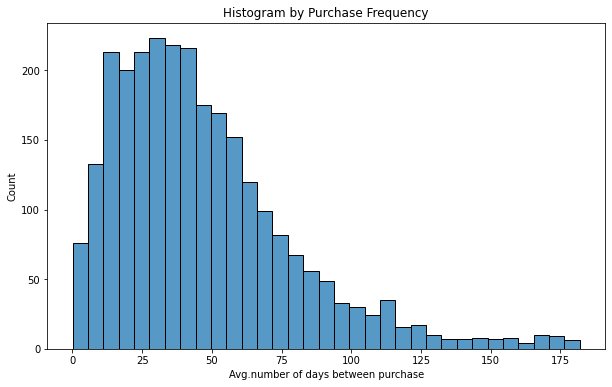

In [ ]:
plt.figure(figsize = (10,6))
sns.histplot(summary_df['invoicedate_purchase_frequency'])
plt.title('Histogram by Purchase Frequency')
plt.xlabel('Avg.number of days between purchase')
plt.show()

**Note**:  
Phần lớn khách hàng lặp lại việc mua hàng sau 20 ngày đến 50 ngày.

#Prediction 3 Months for CLV
- Xây dựng model dự đoán khách hàng trong vòng 3 tháng
- Prepare data:
  + Tách dữ liệu thành các khối trong 3 tháng
  + Lấy dữ liệu 3 tháng cuối làm target
  + Dữ liệu các tháng còn lại sử dụng làm feature

##Data preparation

Phân nhóm dữ liệu, 3 tháng 1 nhóm.

In [114]:
clv_freq = '3M'

In [115]:
data_df = orders.reset_index().groupby(
    ['CustomerID',pd.Grouper(key='InvoiceDate',freq=clv_freq)]).agg({
        'TotalPrice':[sum,groupby_mean, groupby_count]
    }).reset_index()

In [116]:
data_df

CustomerID InvoiceDate TotalPrice                        
                                   sum      monetary frequency
0       12346.0  2011-03-31   77183.60  77183.600000         1
1       12347.0  2010-12-31     711.79    711.790000         1
2       12347.0  2011-03-31     475.39    475.390000         1
3       12347.0  2011-06-30    1018.77    509.385000         2
4       12347.0  2011-09-30     584.91    584.910000         1
...         ...         ...        ...           ...       ...
9369    18283.0  2011-06-30     524.68    131.170000         4
9370    18283.0  2011-09-30     278.09     92.696667         3
9371    18283.0  2011-12-31     974.21    162.368333         6
9372    18287.0  2011-06-30     765.28    765.280000         1
9373    18287.0  2011-12-31    1072.00    536.000000         2

[9374 rows x 5 columns]

In [117]:
data_df.columns = ['_'.join(col).lower() for col in data_df.columns]

In [118]:
data_df.head()

,customerid_,invoicedate_,totalprice_sum,totalprice_monetary,totalprice_frequency
0,12346.0,2011-03-31,77183.60,77183.600,1
1,12347.0,2010-12-31,711.79,711.790,1
2,12347.0,2011-03-31,475.39,475.390,1
3,12347.0,2011-06-30,1018.77,509.385,2
4,12347.0,2011-09-30,584.91,584.910,1


## Mã hóa các giá trị ngày:M_1, M_2, M_3
- Số nhỏ đại diện cho ngày gần nhất

In [119]:
data_month_map = {
    str(x)[:10]:'M_%s' %(i+1) for i, x in enumerate(
        sorted(data_df.reset_index()['invoicedate_'].unique(), reverse = True)
    )
}

In [120]:
data_df['M'] = data_df['invoicedate_'].apply(lambda x: data_month_map[str(x)[:10]])

In [121]:
data_month_map

{'2010-12-31': 'M_5',
 '2011-03-31': 'M_4',
 '2011-06-30': 'M_3',
 '2011-09-30': 'M_2',
 '2011-12-31': 'M_1'}

In [122]:
data_df.head()

,customerid_,invoicedate_,totalprice_sum,totalprice_monetary,totalprice_frequency,M
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4
1,12347.0,2010-12-31,711.79,711.790,1,M_5
2,12347.0,2011-03-31,475.39,475.390,1,M_4
3,12347.0,2011-06-30,1018.77,509.385,2,M_3
4,12347.0,2011-09-30,584.91,584.910,1,M_2


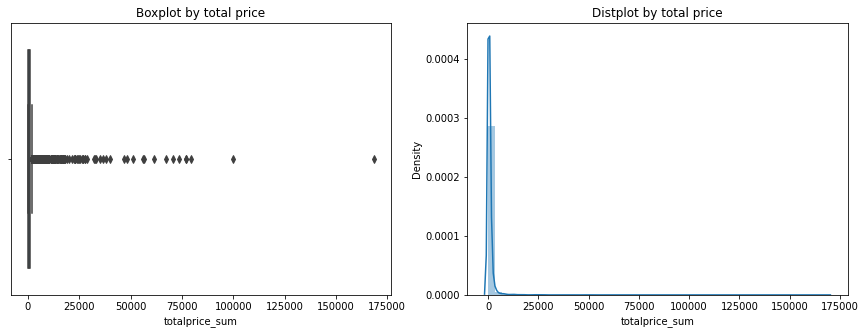

In [167]:
f,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data_df['totalprice_sum'], ax=ax1).set_title('Boxplot by total price')
sns.distplot(data_df['totalprice_sum'], ax = ax2).set_title('Distplot by total price')
plt.show()

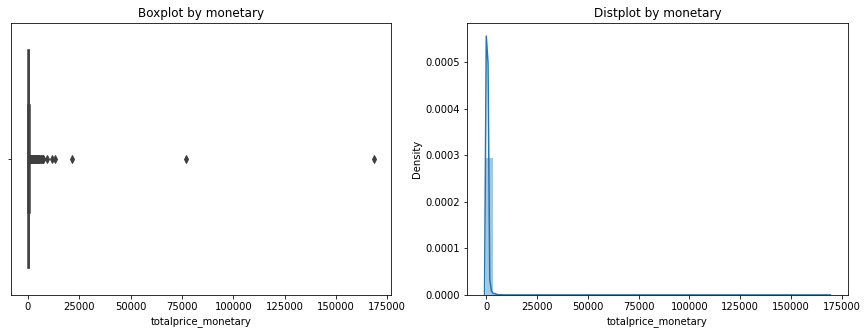

In [168]:
f,(ax1,ax2) = plt.subplots(1,2,figsize = (15,5))
sns.boxplot(data_df['totalprice_monetary'], ax=ax1).set_title('Boxplot by monetary')
sns.distplot(data_df['totalprice_monetary'], ax = ax2).set_title('Distplot by monetary')
plt.show()

## StandardScaler

In [170]:
from sklearn.preprocessing import StandardScaler

In [171]:
scaler = StandardScaler()

In [177]:
sk_price = scaler.fit_transform(data_df['totalprice_sum'].values.reshape(-1,1))
sk_monetary = scaler.fit_transform(data_df['totalprice_monetary'].values.reshape(-1,1))

In [178]:
data_df['scaler_totalprice_sum'] = sk_price
data_df['scaler_totalprice_monetary'] = sk_monetary

In [179]:
data_df.head()

,customerid_,invoicedate_,totalprice_sum,totalprice_monetary,totalprice_frequency,M,scaler_totalprice_sum,scaler_totalprice_monetary
0,12346.0,2011-03-31,77183.60,77183.600,1,M_4,21.210523,38.657297
1,12347.0,2010-12-31,711.79,711.790,1,M_5,-0.066459,0.139372
2,12347.0,2011-03-31,475.39,475.390,1,M_4,-0.132233,0.020300
3,12347.0,2011-06-30,1018.77,509.385,2,M_3,0.018953,0.037423
4,12347.0,2011-09-30,584.91,584.910,1,M_2,-0.101761,0.075464


##Building Sample Set

In [180]:
features_df = pd.pivot_table(
    data_df.loc[data_df['M'] != 'M_1'],
    values=['scaler_totalprice_sum','scaler_totalprice_monetary','totalprice_frequency'],
    columns ='M',
    index='customerid_'
)

In [181]:
features_df.head()

scaler_totalprice_monetary                                 \
M                                  M_2       M_3        M_4       M_5   
customerid_                                                             
12346.0                            NaN       NaN  38.657297       NaN   
12347.0                       0.075464  0.037423   0.020300  0.139372   
12348.0                      -0.063005 -0.034295  -0.104590  0.230544   
12350.0                            NaN       NaN  -0.050715       NaN   
12352.0                      -0.059857       NaN  -0.061815       NaN   

            scaler_totalprice_sum                                 \
M                             M_2       M_3        M_4       M_5   
customerid_                                                        
12346.0                       NaN       NaN  21.210523       NaN   
12347.0                 -0.101761  0.018953  -0.132233 -0.066459   
12348.0                 -0.178250 -0.162391  -0.201221 -0.016096   
12350.0                       NaN       NaN  -0.171462       NaN   
12352.0                 -0.088520       NaN   0.170044       NaN   

            totalprice_frequency                 
M                            M_2  M_3  M_4  M_5  
customerid_                                      
12346.0                      NaN  NaN  1.0  NaN  
12347.0                      1.0  2.0  1.0  1.0  
12348.0                      1.0  1.0  1.0  1.0  
12350.0                      NaN  NaN  1.0  NaN  
12352.0                      2.0  NaN  5.0  NaN

In [182]:
features_df.columns = ['_'.join(col) for col in features_df.columns]

In [183]:
features_df.head()

,scaler_totalprice_monetary_M_2,scaler_totalprice_monetary_M_3,scaler_totalprice_monetary_M_4,scaler_totalprice_monetary_M_5,scaler_totalprice_sum_M_2,scaler_totalprice_sum_M_3,scaler_totalprice_sum_M_4,scaler_totalprice_sum_M_5,totalprice_frequency_M_2,totalprice_frequency_M_3,totalprice_frequency_M_4,totalprice_frequency_M_5
customerid_,,,,,,,,,,,,
12346.0,NaN,NaN,38.657297,NaN,NaN,NaN,21.210523,NaN,NaN,NaN,1.0,NaN
12347.0,0.075464,0.037423,0.020300,0.139372,-0.101761,0.018953,-0.132233,-0.066459,1.0,2.0,1.0,1.0
12348.0,-0.063005,-0.034295,-0.104590,0.230544,-0.178250,-0.162391,-0.201221,-0.016096,1.0,1.0,1.0,1.0
12350.0,NaN,NaN,-0.050715,NaN,NaN,NaN,-0.171462,NaN,NaN,NaN,1.0,NaN
12352.0,-0.059857,NaN,-0.061815,NaN,-0.088520,NaN,0.170044,NaN,2.0,NaN,5.0,NaN


In [184]:
#Handle na
features_df = features_df.fillna(0)
features_df.head()

,scaler_totalprice_monetary_M_2,scaler_totalprice_monetary_M_3,scaler_totalprice_monetary_M_4,scaler_totalprice_monetary_M_5,scaler_totalprice_sum_M_2,scaler_totalprice_sum_M_3,scaler_totalprice_sum_M_4,scaler_totalprice_sum_M_5,totalprice_frequency_M_2,totalprice_frequency_M_3,totalprice_frequency_M_4,totalprice_frequency_M_5
customerid_,,,,,,,,,,,,
12346.0,0.000000,0.000000,38.657297,0.000000,0.000000,0.000000,21.210523,0.000000,0.0,0.0,1.0,0.0
12347.0,0.075464,0.037423,0.020300,0.139372,-0.101761,0.018953,-0.132233,-0.066459,1.0,2.0,1.0,1.0
12348.0,-0.063005,-0.034295,-0.104590,0.230544,-0.178250,-0.162391,-0.201221,-0.016096,1.0,1.0,1.0,1.0
12350.0,0.000000,0.000000,-0.050715,0.000000,0.000000,0.000000,-0.171462,0.000000,0.0,0.0,1.0,0.0
12352.0,-0.059857,0.000000,-0.061815,0.000000,-0.088520,0.000000,0.170044,0.000000,2.0,0.0,5.0,0.0


In [185]:
response_df = data_df.loc[ data_df['M']=='M_1',['customerid_','totalprice_sum']]

In [186]:
response_df.head()

,customerid_,totalprice_sum
5,12347.0,1519.14
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [187]:
response_df.columns = ['customerid_','CLV_'+clv_freq]

In [188]:
response_df.head()

,customerid_,CLV_3M
5,12347.0,1519.14
10,12349.0,1757.55
14,12352.0,311.73
20,12356.0,58.35
21,12357.0,6207.67


In [210]:
sample_set_df = features_df.merge(
    response_df,
    left_index = True,
    right_on = 'customerid_',
    how='left'
)

In [211]:
sample_set_df.head()

,scaler_totalprice_monetary_M_2,scaler_totalprice_monetary_M_3,scaler_totalprice_monetary_M_4,scaler_totalprice_monetary_M_5,scaler_totalprice_sum_M_2,scaler_totalprice_sum_M_3,scaler_totalprice_sum_M_4,scaler_totalprice_sum_M_5,totalprice_frequency_M_2,totalprice_frequency_M_3,totalprice_frequency_M_4,totalprice_frequency_M_5,customerid_,CLV_3M
NaN,0.000000,0.000000,38.657297,0.000000,0.000000,0.000000,21.210523,0.000000,0.0,0.0,1.0,0.0,12346.0,NaN
5.0,0.075464,0.037423,0.020300,0.139372,-0.101761,0.018953,-0.132233,-0.066459,1.0,2.0,1.0,1.0,12347.0,1519.14
NaN,-0.063005,-0.034295,-0.104590,0.230544,-0.178250,-0.162391,-0.201221,-0.016096,1.0,1.0,1.0,1.0,12348.0,NaN
NaN,0.000000,0.000000,-0.050715,0.000000,0.000000,0.000000,-0.171462,0.000000,0.0,0.0,1.0,0.0,12350.0,NaN
14.0,-0.059857,0.000000,-0.061815,0.000000,-0.088520,0.000000,0.170044,0.000000,2.0,0.0,5.0,0.0,12352.0,311.73


In [191]:
sample_set_df = sample_set_df.fillna(0)

##Regression Models

In [192]:
from sklearn.model_selection import train_test_split

In [193]:
target_var = 'CLV_' + clv_freq
all_features = [x for x in sample_set_df.columns if x not in ['customerid_',target_var]]

In [194]:
all_features

['scaler_totalprice_monetary_M_2',
 'scaler_totalprice_monetary_M_3',
 'scaler_totalprice_monetary_M_4',
 'scaler_totalprice_monetary_M_5',
 'scaler_totalprice_sum_M_2',
 'scaler_totalprice_sum_M_3',
 'scaler_totalprice_sum_M_4',
 'scaler_totalprice_sum_M_5',
 'totalprice_frequency_M_2',
 'totalprice_frequency_M_3',
 'totalprice_frequency_M_4',
 'totalprice_frequency_M_5']

In [195]:
target_var

'CLV_3M'

In [196]:
X_train, X_test, y_train, y_test = train_test_split(
    sample_set_df[all_features],
    sample_set_df[target_var],
    test_size = 0.3
)

##Select best Model

In [197]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [198]:
from sklearn.metrics import r2_score, median_absolute_error

In [199]:
models = [
          LinearRegression(),
          SVR(),
          RandomForestRegressor()
]

In [200]:
for model in models:
  model.fit(X_train,y_train)
  model_name = model.__class__.__name__
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  R_square_train = r2_score(y_true = y_train, y_pred=train_preds)
  MSE = median_absolute_error(y_true = y_train,y_pred=train_preds)
  print(model_name,':\n','R^2:%0.2f'%(R_square_train),'\n','MSE:%0.2f'%(MSE))


LinearRegression :
 R^2:0.84 
 MSE:283.86
SVR :
 R^2:-0.02 
 MSE:109.61
RandomForestRegressor :
 R^2:0.97 
 MSE:76.22


Từ kết quả R_square và MSE (median absolute error), cho thấy model RandomForestRegreasor và LinearRegression phù hợp với tập dữ liệu.
Trong đó, R^2 và MSE của RandomForestRegressor có hiệu suất tốt hơn.

##RandomForestRegressor

In [201]:
model = RandomForestRegressor()

In [202]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [203]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [204]:
print('In Sample R square: %0.2f'% r2_score(y_true=y_train,y_pred=train_preds))
print('Out Sample R Square: %0.2f'%r2_score(y_true = y_test, y_pred=test_preds))

In Sample R square: 0.96
Out Sample R Square: 0.04


**Model is overfitting**

In [205]:
print('In Sample MSE: %0.2f'%median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out Sample MSE: %0.2f'%median_absolute_error(y_true=y_test,y_pred=test_preds))

In Sample MSE: 74.22
Out Sample MSE: 210.09


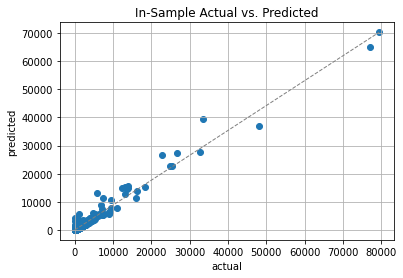

In [206]:
plt.scatter(y_train, train_preds)
plt.plot([0, max(y_train)], [0, max(train_preds)],
color='gray',
lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('In-Sample Actual vs. Predicted')
plt.grid()
plt.show()

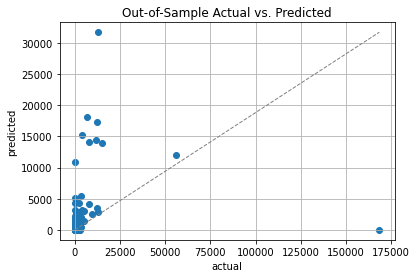

In [207]:
plt.scatter(y_test, test_preds)
plt.plot([0, max(y_test)], [0, max(test_preds)],
color='gray',
lw=1, linestyle='--')
plt.xlabel('actual')
plt.ylabel('predicted')
plt.title('Out-of-Sample Actual vs. Predicted')
plt.grid()
plt.show()

#Prediction 1 Months for CLV
Xây dựng model dự đoán khách hàng trong vòng 1 tháng.
Prepare data:  
*  Tách dữ liệu thành các khối trong 1 tháng
*  Lấy dữ liệu 1 tháng cuối làm target
*   Dữ liệu các tháng còn lại sử dụng làm feature




## Customer Lifetime Values

In [257]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [265]:
data_1month = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda date: (date.max() - date.min()).days,
    'InvoiceNo': lambda num: len(num),
    'Quantity': lambda x:x.sum(),
    'TotalPrice': lambda x: x.sum()
}).reset_index()

In [267]:
data_1month.head()

,CustomerID,InvoiceDate,InvoiceNo,Quantity,TotalPrice
0,12346.0,0,1,74215,77183.60
1,12347.0,365,182,2458,4310.00
2,12348.0,282,31,2341,1797.24
3,12349.0,0,73,631,1757.55
4,12350.0,0,17,197,334.40


In [270]:
#Change the name of columns
data_1month.columns = [
                       'customerid',
                       'num_day',
                       'num_transactions',
                       'num_units',
                       'spent_money'
]

In [271]:
data_1month.head()

,customerid,num_day,num_transactions,num_units,spent_money
0,12346.0,0,1,74215,77183.60
1,12347.0,365,182,2458,4310.00
2,12348.0,282,31,2341,1797.24
3,12349.0,0,73,631,1757.55
4,12350.0,0,17,197,334.40


In [272]:
#Average Order Value
data_1month['avg_order_value']=data_1month['spent_money']/data_1month['num_transactions']

In [279]:
#Purchase Frequency
purchase_frequency = sum(data_1month['num_transactions'])/data_1month.shape[0]
purchase_frequency

91.70868863793501

In [281]:
#Repeate rate
repeate_rate = data_1month[data_1month.num_transactions > 1].shape[0]/data_1month.shape[0]
repeate_rate

0.9834063148190827

In [283]:
#Churn rate
churn_rate = 1 - repeate_rate
churn_rate

0.016593685180917306

In [284]:
#Profit Margin
data_1month['profit_margin'] = data_1month['spent_money']*0.05

In [285]:
data_1month.head()

,customerid,num_day,num_transactions,num_units,spent_money,avg_order_value,profit_margin
0,12346.0,0,1,74215,77183.60,77183.600000,3859.1800
1,12347.0,365,182,2458,4310.00,23.681319,215.5000
2,12348.0,282,31,2341,1797.24,57.975484,89.8620
3,12349.0,0,73,631,1757.55,24.076027,87.8775
4,12350.0,0,17,197,334.40,19.670588,16.7200


###Customer Values

In [286]:
data_1month['CV']=(data_1month['avg_order_value']*purchase_frequency)/churn_rate

###Customer Lifetime Values

In [298]:
data_1month['CLV'] = data_1month['CV']*data_1month['profit_margin']

In [288]:
data_1month.head()

,customerid,num_day,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CV,CLV
0,12346.0,0,1,74215,77183.60,77183.600000,3859.1800,4.265723e+08,1.646219e+12
1,12347.0,365,182,2458,4310.00,23.681319,215.5000,1.308801e+05,2.820466e+07
2,12348.0,282,31,2341,1797.24,57.975484,89.8620,3.204144e+05,2.879308e+07
3,12349.0,0,73,631,1757.55,24.076027,87.8775,1.330615e+05,1.169311e+07
4,12350.0,0,17,197,334.40,19.670588,16.7200,1.087139e+05,1.817696e+06


## Prediction Model by 1 month

In [315]:
pre_1month = orders.reset_index().groupby(by = ['CustomerID', 'InvoiceDate'])['TotalPrice'].sum().reset_index()

In [316]:
pre_1month.head()

,CustomerID,InvoiceDate,TotalPrice
0,12346.0,2011-01-18 10:01:00,77183.60
1,12347.0,2010-12-07 14:57:00,711.79
2,12347.0,2011-01-26 14:30:00,475.39
3,12347.0,2011-04-07 10:43:00,636.25
4,12347.0,2011-06-09 13:01:00,382.52


In [317]:
pre_1month['month_year'] = pre_1month['InvoiceDate'].apply(lambda x:x.strftime('%b-%Y'))

In [318]:
pre_1month.head()

,CustomerID,InvoiceDate,TotalPrice,month_year
0,12346.0,2011-01-18 10:01:00,77183.60,Jan-2011
1,12347.0,2010-12-07 14:57:00,711.79,Dec-2010
2,12347.0,2011-01-26 14:30:00,475.39,Jan-2011
3,12347.0,2011-04-07 10:43:00,636.25,Apr-2011
4,12347.0,2011-06-09 13:01:00,382.52,Jun-2011


In [319]:
pre_1month = pre_1month.merge(data_1month,left_on='CustomerID', right_on = 'customerid')

In [320]:
pre_1month.head()

,CustomerID,InvoiceDate,TotalPrice,month_year,customerid,num_day,num_transactions,num_units,spent_money,avg_order_value,profit_margin,CV,CLV
0,12346.0,2011-01-18 10:01:00,77183.60,Jan-2011,12346.0,0,1,74215,77183.6,77183.600000,3859.18,4.265723e+08,1.646219e+12
1,12347.0,2010-12-07 14:57:00,711.79,Dec-2010,12347.0,365,182,2458,4310.0,23.681319,215.50,1.308801e+05,2.820466e+07
2,12347.0,2011-01-26 14:30:00,475.39,Jan-2011,12347.0,365,182,2458,4310.0,23.681319,215.50,1.308801e+05,2.820466e+07
3,12347.0,2011-04-07 10:43:00,636.25,Apr-2011,12347.0,365,182,2458,4310.0,23.681319,215.50,1.308801e+05,2.820466e+07
4,12347.0,2011-06-09 13:01:00,382.52,Jun-2011,12347.0,365,182,2458,4310.0,23.681319,215.50,1.308801e+05,2.820466e+07


In [321]:
pre_1month = pre_1month.drop(columns = ['InvoiceDate','TotalPrice','customerid','num_day','num_transactions','num_units','spent_money','profit_margin','CV','avg_order_value'])

In [323]:
pre_1month.head()

,CustomerID,month_year,CLV
0,12346.0,Jan-2011,1.646219e+12
1,12347.0,Dec-2010,2.820466e+07
2,12347.0,Jan-2011,2.820466e+07
3,12347.0,Apr-2011,2.820466e+07
4,12347.0,Jun-2011,2.820466e+07


In [325]:
sale=pre_1month.pivot_table(index=['CustomerID'],columns=['month_year'],values='CLV',aggfunc='sum',fill_value=0).reset_index()

In [326]:
sale.head()

month_year,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011
0,12346.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.646219e+12,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00
1,12347.0,2.820466e+07,2.820466e+07,2.820466e+07,2.820466e+07,0.000000e+00,2.820466e+07,0.0,2.820466e+07,0.0,0.0,0.000000e+00,2.820466e+07,0.000000e+00
2,12348.0,2.879308e+07,0.000000e+00,2.879308e+07,0.000000e+00,0.000000e+00,2.879308e+07,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,2.879308e+07
3,12349.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,1.169311e+07,0.000000e+00,0.000000e+00
4,12350.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.817696e+06,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00


In [327]:
sale['CLV']=sale.iloc[:,2:].sum(axis=1)

In [328]:
sale.head()

month_year,CustomerID,Apr-2011,Aug-2011,Dec-2010,Dec-2011,Feb-2011,Jan-2011,Jul-2011,Jun-2011,Mar-2011,May-2011,Nov-2011,Oct-2011,Sep-2011,CLV
0,12346.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.646219e+12,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.646219e+12
1,12347.0,2.820466e+07,2.820466e+07,2.820466e+07,2.820466e+07,0.000000e+00,2.820466e+07,0.0,2.820466e+07,0.0,0.0,0.000000e+00,2.820466e+07,0.000000e+00,1.692279e+08
2,12348.0,2.879308e+07,0.000000e+00,2.879308e+07,0.000000e+00,0.000000e+00,2.879308e+07,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,2.879308e+07,8.637924e+07
3,12349.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.0,0.0,1.169311e+07,0.000000e+00,0.000000e+00,1.169311e+07
4,12350.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.817696e+06,0.000000e+00,0.0,0.000000e+00,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.817696e+06


In [329]:
X = sale.drop(columns = ['CustomerID','CLV'])
y = sale[['CLV']]

In [333]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [334]:
for model in models:
  model.fit(X_train,y_train)
  model_name = model.__class__.__name__
  train_preds = model.predict(X_train)
  test_preds = model.predict(X_test)
  R_square_train = r2_score(y_true = y_train, y_pred=train_preds)
  MSE = median_absolute_error(y_true = y_train,y_pred=train_preds)
  print(model_name,':\n','R^2:%0.2f'%(R_square_train),'\n','MSE:%0.2f'%(MSE))

LinearRegression :
 R^2:1.00 
 MSE:0.00
SVR :
 R^2:-0.00 
 MSE:6383346.33
RandomForestRegressor :
 R^2:0.85 
 MSE:296554.81


###LinearRegression

In [335]:
lr = LinearRegression()

In [336]:
lr.fit(X_train,y_train)

LinearRegression()

In [337]:
train_preds = lr.predict(X_train)
test_preds = lr.predict(X_test)

In [338]:
print('In Sample R square: %0.2f'% r2_score(y_true=y_train,y_pred=train_preds))
print('Out Sample R Square: %0.2f'%r2_score(y_true = y_test, y_pred=test_preds))

In Sample R square: 1.00
Out Sample R Square: 1.00


In [339]:
print('In Sample MSE: %0.2f'%median_absolute_error(y_true=y_train, y_pred=train_preds))
print('Out Sample MSE: %0.2f'%median_absolute_error(y_true=y_test,y_pred=test_preds))

In Sample MSE: 0.00
Out Sample MSE: 0.00
